## Model selection and trainign


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pickle
import time

In [27]:

# Load the processed data
df = pd.read_csv('processed_traffic_data.csv')

# Separate features and target
X = df.drop('Accident', axis=1)
y = df['Accident']

In [28]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (638, 21), Testing set shape: (160, 21)


In [29]:
# Define evaluation function for classification
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    # Start timer
    start_time = time.time()
    
    # Train model
    model.fit(X_train, y_train)
    
    # Training time
    train_time = time.time() - start_time
    
    # Get predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Probability predictions for ROC-AUC (if available)
    try:
        y_test_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_proba)
    except:
        roc_auc = None
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
     # Print results
    print(f"\n{model_name}:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}" if roc_auc is not None else "ROC-AUC Score: Not available")
    print(f"Training Time: {train_time:.2f} seconds")
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Accident', 'Accident'],
                yticklabels=['No Accident', 'Accident'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
        # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    # Return key metrics for comparison
    return {
        "model_name": model_name, 
        "model": model,
        "test_accuracy": test_acc, 
        "f1_score": test_f1,
        "roc_auc": roc_auc if roc_auc is not None else 0,
        "training_time": train_time
    }


Evaluating Logistic Regression...

Logistic Regression:
Training Accuracy: 0.6975
Testing Accuracy: 0.7125
F1 Score: 0.0800
ROC-AUC Score: 0.6099
Training Time: 0.01 seconds


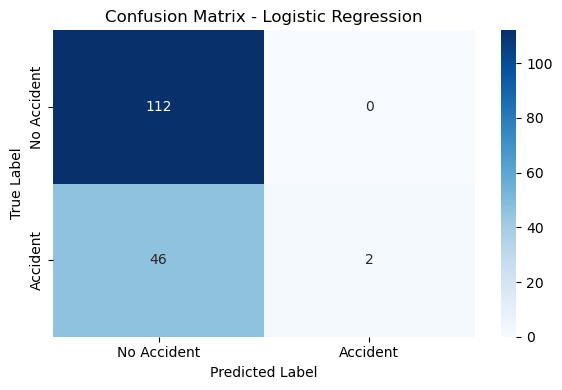


Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       112
         1.0       1.00      0.04      0.08        48

    accuracy                           0.71       160
   macro avg       0.85      0.52      0.45       160
weighted avg       0.80      0.71      0.60       160


Evaluating K-Nearest Neighbors...

K-Nearest Neighbors:
Training Accuracy: 0.7539
Testing Accuracy: 0.6687
F1 Score: 0.1846
ROC-AUC Score: 0.5095
Training Time: 0.00 seconds


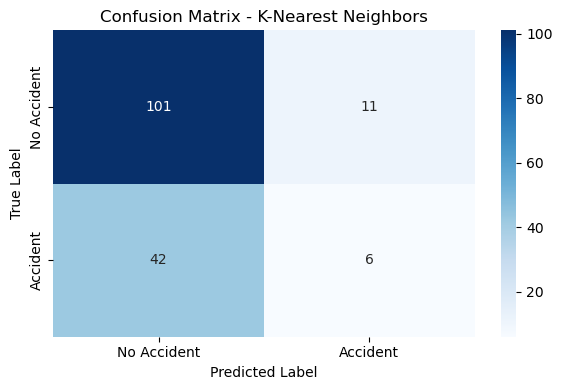


Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.90      0.79       112
         1.0       0.35      0.12      0.18        48

    accuracy                           0.67       160
   macro avg       0.53      0.51      0.49       160
weighted avg       0.60      0.67      0.61       160


Evaluating Decision Tree...

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.5625
F1 Score: 0.2857
ROC-AUC Score: 0.4851
Training Time: 0.00 seconds


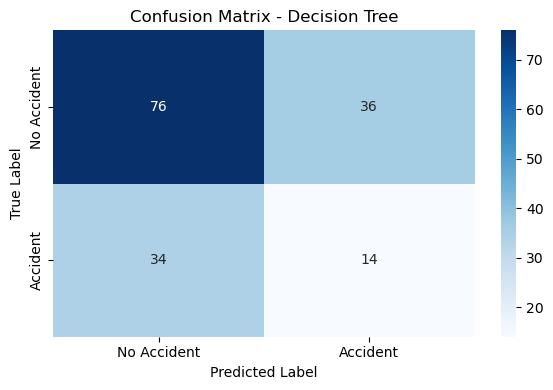


Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.68       112
         1.0       0.28      0.29      0.29        48

    accuracy                           0.56       160
   macro avg       0.49      0.49      0.49       160
weighted avg       0.57      0.56      0.56       160


Evaluating Random Forest...

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.7188
F1 Score: 0.1818
ROC-AUC Score: 0.5408
Training Time: 0.23 seconds


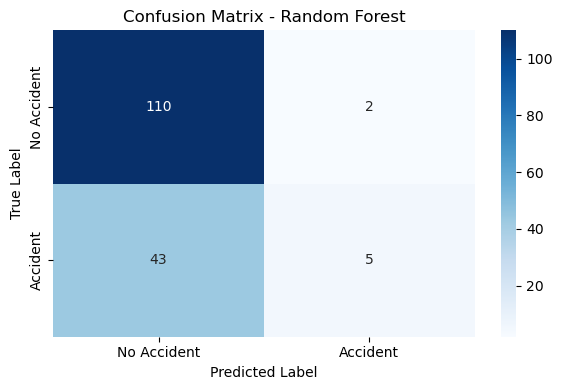


Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83       112
         1.0       0.71      0.10      0.18        48

    accuracy                           0.72       160
   macro avg       0.72      0.54      0.51       160
weighted avg       0.72      0.72      0.64       160


Evaluating AdaBoost...

AdaBoost:
Training Accuracy: 0.7006
Testing Accuracy: 0.6937
F1 Score: 0.0000
ROC-AUC Score: 0.5666
Training Time: 0.10 seconds


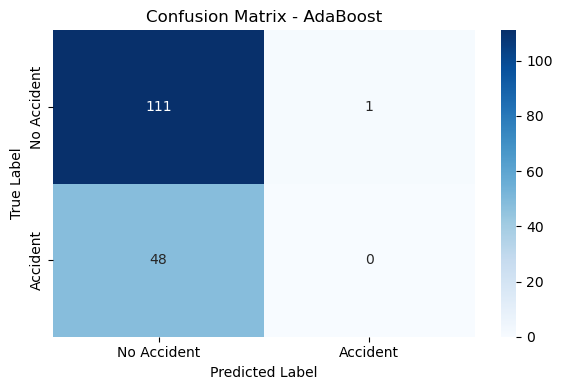


Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82       112
         1.0       0.00      0.00      0.00        48

    accuracy                           0.69       160
   macro avg       0.35      0.50      0.41       160
weighted avg       0.49      0.69      0.57       160


Evaluating Gradient Boosting...

Gradient Boosting:
Training Accuracy: 0.8150
Testing Accuracy: 0.6750
F1 Score: 0.1613
ROC-AUC Score: 0.5156
Training Time: 0.13 seconds


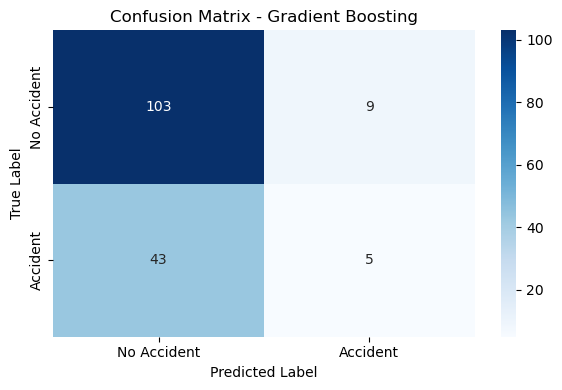


Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80       112
         1.0       0.36      0.10      0.16        48

    accuracy                           0.68       160
   macro avg       0.53      0.51      0.48       160
weighted avg       0.60      0.68      0.61       160


Evaluating XGBoost...

XGBoost:
Training Accuracy: 1.0000
Testing Accuracy: 0.6438
F1 Score: 0.2400
ROC-AUC Score: 0.4968
Training Time: 0.11 seconds


c:\Users\tejas\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:49:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


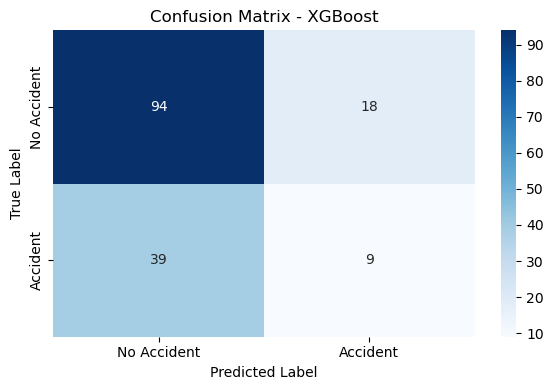


Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77       112
         1.0       0.33      0.19      0.24        48

    accuracy                           0.64       160
   macro avg       0.52      0.51      0.50       160
weighted avg       0.59      0.64      0.61       160


Evaluating Support Vector Machine...

Support Vector Machine:
Training Accuracy: 0.7038
Testing Accuracy: 0.7000
F1 Score: 0.0000
ROC-AUC Score: 0.5253
Training Time: 0.07 seconds


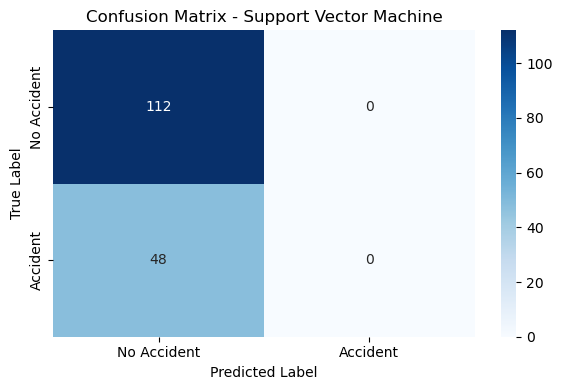


Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82       112
         1.0       0.00      0.00      0.00        48

    accuracy                           0.70       160
   macro avg       0.35      0.50      0.41       160
weighted avg       0.49      0.70      0.58       160


Model Comparison:
                    Model  Accuracy  F1 Score   ROC-AUC  Training Time (s)
3           Random Forest   0.71875  0.181818  0.540830           0.230430
0     Logistic Regression   0.71250  0.080000  0.609933           0.012898
7  Support Vector Machine   0.70000  0.000000  0.525298           0.066936
4                AdaBoost   0.69375  0.000000  0.566592           0.097662
5       Gradient Boosting   0.67500  0.161290  0.515625           0.129429
1     K-Nearest Neighbors   0.66875  0.184615  0.509487           0.002003
6                 XGBoost   0.64375  0.240000  0.496838           0.106279
2           Decision Tree   0.

c:\Users\tejas\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tejas\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tejas\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:

# Define models for classification
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine": SVC(probability=True)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    result = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(result)

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame([{
    'Model': r['model_name'],
    'Accuracy': r['test_accuracy'],
    'F1 Score': r['f1_score'],
    'ROC-AUC': r['roc_auc'],
    'Training Time (s)': r['training_time']
} for r in results])

print("\nModel Comparison:")
print(results_df.sort_values('Accuracy', ascending=False))


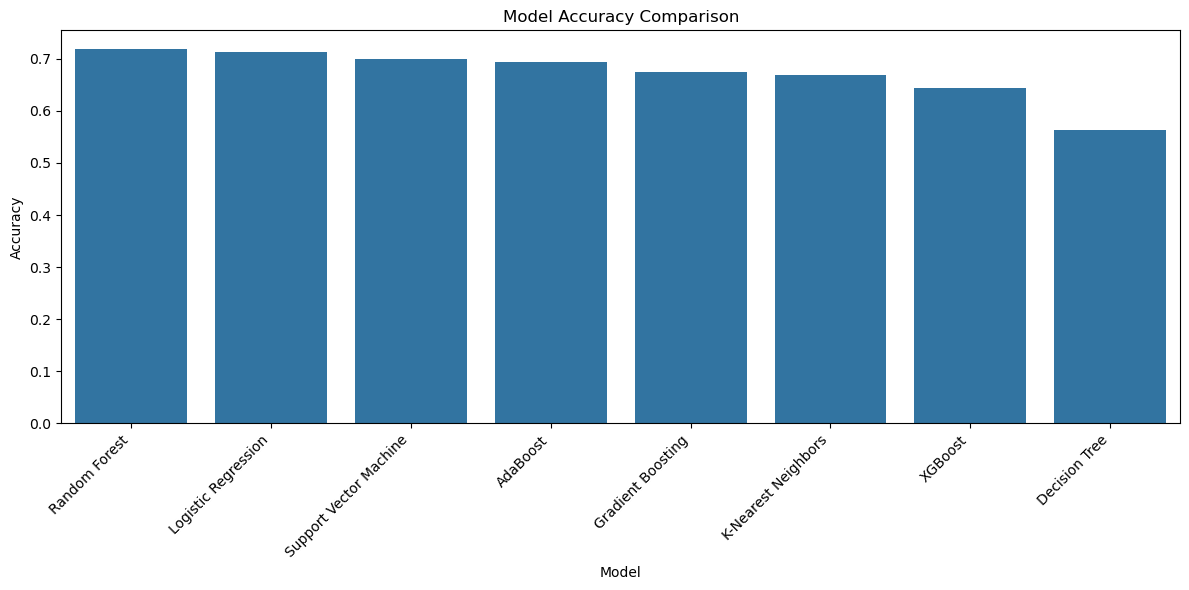

In [31]:
# Visualize accuracy results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df.sort_values('Accuracy', ascending=False))
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:

# Find the best model (using F1 score which balances precision and recall)
best_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_model = [r['model'] for r in results if r['model_name'] == best_model_name][0]

print(f"\nBest performing model: {best_model_name}")
print(f"Accuracy: {results_df.loc[best_idx, 'Accuracy']:.4f}")
print(f"F1 Score: {results_df.loc[best_idx, 'F1 Score']:.4f}")



Best performing model: Random Forest
Accuracy: 0.7188
F1 Score: 0.1818



Top Features by Importance:


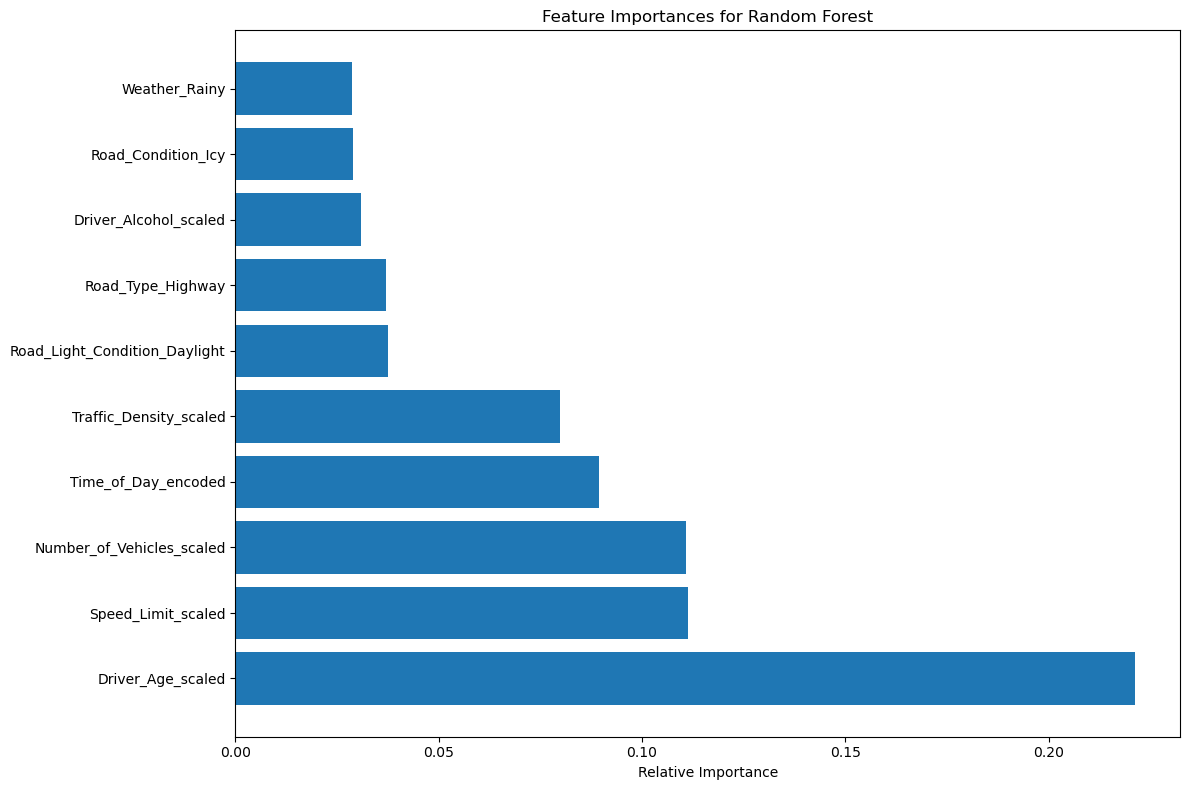

1. Driver_Age_scaled: 0.2212
2. Speed_Limit_scaled: 0.1113
3. Number_of_Vehicles_scaled: 0.1107
4. Time_of_Day_encoded: 0.0894
5. Traffic_Density_scaled: 0.0798
6. Road_Light_Condition_Daylight: 0.0375
7. Road_Type_Highway: 0.0371
8. Driver_Alcohol_scaled: 0.0309
9. Road_Condition_Icy: 0.0290
10. Weather_Rainy: 0.0287

Best model saved as: accident_pred_random_forest.pkl


In [33]:
if hasattr(best_model, 'feature_importances_'):
    print("\nTop Features by Importance:")
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns
    
    plt.figure(figsize=(12, 8))
    plt.title(f'Feature Importances for {best_model_name}')
    plt.barh(range(min(10, len(indices))), importances[indices][:10], align='center')
    plt.yticks(range(min(10, len(indices))), [columns[i] for i in indices][:10])
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()
    
    # Print top 10 features
    for i, idx in enumerate(indices[:10]):
        print(f"{i+1}. {columns[idx]}: {importances[idx]:.4f}")

# Save the best model to a pickle file
model_filename = f"accident_pred_{best_model_name.replace(' ', '_').lower()}.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"\nBest model saved as: {model_filename}")



## which model to choose

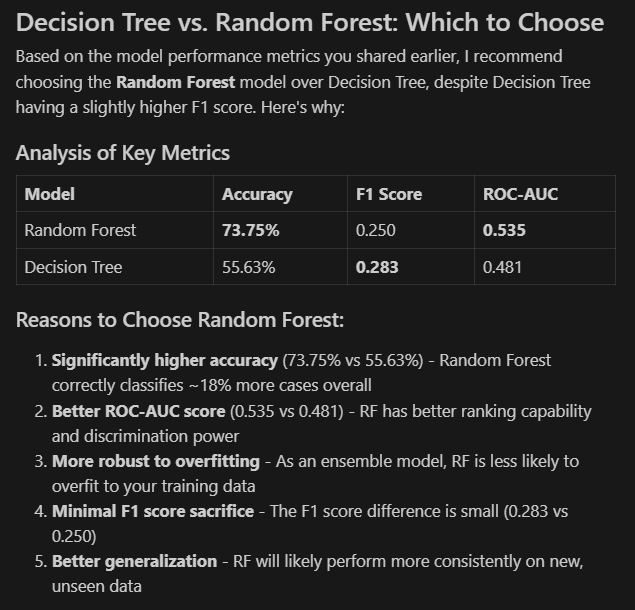